# Testing different conditions for regression

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
from re import sub
from decimal import Decimal
from matplotlib import pyplot as plt
import datetime
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import word_tokenize, WordNetLemmatizer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Imputer, StandardScaler
from math import sqrt
import tests as t
import re
import nltk
from sklearn.preprocessing import OneHotEncoder
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor
import folium

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import xgboost as xgb
pd.set_option('display.max_columns', 106)

import collections

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sousa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sousa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sousa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
porto = pd.read_csv(r"C:\Users\sousa\Desktop\github\Airbnb Tale of 2 cities\Data Portugal\porto_listings.csv")
lisbon = pd.read_csv(r"C:\Users\sousa\Desktop\github\Airbnb Tale of 2 cities\Data Portugal\lisbon_listings.csv")

In [36]:
porto.describe()

,Unnamed: 0,id,transit,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,room_type,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_name_present,last_review_present,first_review_present,host_since_present,reviews_p_month_present,...,neighbourhood_cleansed_São Félix da Marinha,neighbourhood_cleansed_São João da Madeira,neighbourhood_cleansed_São João de Ver,neighbourhood_cleansed_São Mamede de Infesta e Senhora da Hora,neighbourhood_cleansed_São Pedro Fins,neighbourhood_cleansed_São Pedro de Castelões,neighbourhood_cleansed_Tropeço,neighbourhood_cleansed_Urrô,neighbourhood_cleansed_Valongo,neighbourhood_cleansed_Vila Chã,neighbourhood_cleansed_Vila Nova da Telha,neighbourhood_cleansed_Vila do Conde,neighbourhood_cleansed_Vilar de Andorinho,neighbourhood_cleansed_Vilar de Pinheiro,neighbourhood_cleansed_Vilar e Mosteiró,neighbourhood_cleansed_Água Longa,neighbourhood_cleansed_Águas Santas,neighbourhood_cleansed_Árvore,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,property_type_Barn,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular (Cuba),property_type_Chalet,property_type_Condominium,property_type_Cottage,property_type_Earth house,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Hut,property_type_In-law,property_type_Loft,property_type_Nature lodge,property_type_Other,property_type_Serviced apartment,property_type_Tiny house,property_type_Townhouse,property_type_Villa,property_type_Windmill,property_type_Yurt,time_in_operation,time_2_first_review,host_in_pt
count,7812.000000,7.812000e+03,7812.000000,7.812000e+03,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.0,7812.000000,7812.000000,7812.000000,7812.00000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.0,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.0,7812.0,7812.0,7812.0,7812.0,...,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000
mean,5585.286226,2.248072e+07,0.703661,1.065660e+08,3.813236,97.177163,0.414363,14.015617,0.998592,0.282642,41.152654,-8.615977,0.720046,1.205197,4.085765,1.341142,1.464286,2.357911,70.268561,0.057988,0.047875,0.900410,19.957117,2.165387,9.254352,2.192140,749.

In [37]:
lisbon.describe()

,Unnamed: 0,id,transit,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,room_type,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_name_present,last_review_present,first_review_present,host_since_present,reviews_p_month_present,...,neighbourhood_cleansed_So Pedro da Cadeira,neighbourhood_cleansed_So Vicente,neighbourhood_cleansed_Sobral de Monte Agrao,neighbourhood_cleansed_Turcifal,neighbourhood_cleansed_Vale do Paraso,neighbourhood_cleansed_Venda do Pinheiro e Santo Estvo das Gals,neighbourhood_cleansed_Venteira,neighbourhood_cleansed_Ventosa,neighbourhood_cleansed_Vermelha,neighbourhood_cleansed_Vialonga,neighbourhood_cleansed_Vila Franca de Xira,neighbourhood_cleansed_Vimeiro,neighbourhood_cleansed_guas Livres,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Campsite,property_type_Casa particular (Cuba),property_type_Castle,property_type_Chalet,property_type_Condominium,property_type_Cottage,property_type_Dome house,property_type_Earth house,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Houseboat,property_type_Hut,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Villa,property_type_Windmill,property_type_Yurt,time_in_operation,time_2_first_review,host_in_pt
count,16615.000000,1.661500e+04,16615.000000,1.661500e+04,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,1.661500e+04,16615.0,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.0,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.0,16615.0,16615.0,16615.0,16615.0,...,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000
mean,12167.147156,2.075850e+07,0.733674,8.219616e+07,3.754920,96.958832,0.341318,21.012699,0.999398,0.320132,38.742800,-9.191860,0.610593,1.231417,4.220764,1.422600,1.694132,2.587060,84.745230,0.069034,0.063738,0.905989,30.522660,2.239663,9.454890,2.5

In [9]:
#function to scale and normalize the dataframes features
def feature_scaling(df, type_scale):
    '''
    This function takes in either the azdias or the customers dataframe and applyes the selected feature scaler
    Args: customer or azdias dataframe and a string representing the type of scaling intended
    returns: scaled dataframe
    '''
    
    features_list = df.columns
    
    if type_scale == 'StandardScaler':
        df_scaled = StandardScaler().fit_transform(df)
        
    if type_scale == 'MinMaxScaler':
        df_scaled = MinMaxScaler().fit_transform(df)
    
    df_scaled = pd.DataFrame(df_scaled)
    df_scaled.columns = features_list
    
    return df_scaled

In [10]:
#pca model
def pca_model(df, n_components):
    '''
    This function defines a model that takes in a previously scaled dataframe and returns the result of 
    the transformation. The output is an onject created post data fitting
    '''
    pca = PCA(n_components)
    pca_df = pca.fit(df)
    
    return pca_df

In [13]:
import matplotlib.pyplot as plt
from pylab import *
#scree plots for PCA
def scree_plots(SS1,SS2, dataname1, dataname2):
    '''
    This function takes in the transformed data using PCA and plots it in scree plots
    '''
    subplot(2,1,1)

    plt.plot(np.cumsum(SS1.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio vs Number of Components SS' + dataname1)
    plt.grid(b=True)

    subplot(2,1,2)
    plt.plot(np.cumsum(SS2.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio vs Number of Components SS' + dataname2)
    plt.grid(b=True)

    plot = tight_layout()
    plot = plt.show()

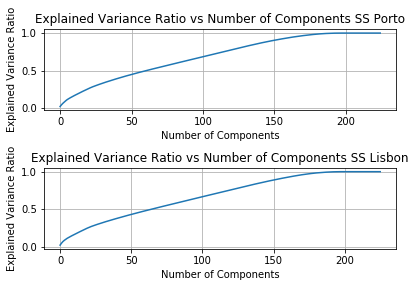

In [14]:
porto_SS = feature_scaling(porto, 'StandardScaler')
lisbon_SS = feature_scaling(lisbon, 'StandardScaler')

n_components_porto = len(porto_SS.columns.values)
n_components_lisbon = len(lisbon_SS.columns.values)

porto_SS_pca = pca_model(porto_SS, n_components_porto)
lisbon_SS_pca = pca_model(lisbon_SS, n_components_lisbon)

scree_plots(porto_SS_pca, lisbon_SS_pca, ' Porto', ' Lisbon')

Using standard scaler with 150 principal components 90% of the original variance can be represented


In [42]:
X_porto = porto.drop('price', 1)
y_porto = porto['price']

X_lisbon = lisbon.drop('price', 1)
y_lisbon = lisbon['price']

In [43]:
# split our data
X_porto_train, X_porto_test, y_porto_train, y_porto_test = train_test_split(X_porto, y_porto, test_size=0.2)

X_lisbon_train, X_lisbon_test, y_lisbon_train, y_lisbon_test = train_test_split(X_lisbon, y_lisbon, test_size=0.2)

### Linear Regression with no scaling, scalling, with pca and without pca

In [23]:
#no scaling and no dimensionality regression
no_scale_no_pca = Pipeline([('linear', linear_model.LinearRegression())])
no_scale_no_pca.fit(X_porto_train, y_porto_train)
y_pred1_porto = no_scale_no_pca.predict(X_porto_test)
linear_reg_err1_porto = metrics.median_absolute_error(y_porto_test, y_pred1_porto)

#with scaling, no dimensionality regression
scale_no_pca = Pipeline([('standardize', StandardScaler()), ('linear', linear_model.LinearRegression())])
scale_no_pca.fit(X_porto_train, y_porto_train)
y_pred2_porto = scale_no_pca.predict(X_porto_test)
linear_reg_err2_porto = metrics.median_absolute_error(y_porto_test, y_pred2_porto)
    
#scaling and dimensionality reduction
scale_pca = Pipeline([('standardize', StandardScaler()),
    ('pca', PCA(n_components = 150)), ('linear', linear_model.LinearRegression())])
scale_pca.fit(X_porto_train, y_porto_train)
y_pred3_porto = scale_pca.predict(X_porto_test)
linear_reg_err3_porto = metrics.median_absolute_error(y_porto_test, y_pred3_porto)

print ("Linear Regression's price deviation without PCA or scaling in Porto: " + str(linear_reg_err1_porto))
print ("Linear Regression's price deviation with scaling in Porto: " + str(linear_reg_err2_porto))
print ("Linear Regression's price deviation with PCA and scaling in Porto: " + str(linear_reg_err3_porto))


Linear Regression's price deviation without PCA or scaling in Porto: 15.683556669722748
Linear Regression's price deviation with scaling in Porto: 16.456618580573945
Linear Regression's price deviation with PCA and scaling in Porto: 16.928502361382755


In [33]:
#no scaling and no dimensionality regression
no_scale_no_pca = Pipeline([('linear', linear_model.LinearRegression())])
no_scale_no_pca.fit(X_lisbon_train, y_lisbon_train)
y_pred1_lisbon = no_scale_no_pca.predict(X_lisbon_test)
linear_reg_err1_lisbon = metrics.median_absolute_error(y_lisbon_test, y_pred1_lisbon)

#with scaling, no dimensionality regression
scale_no_pca = Pipeline([('standardize', StandardScaler()), ('linear', linear_model.LinearRegression())])
scale_no_pca.fit(X_lisbon_train, y_lisbon_train)
y_pred2_lisbon = scale_no_pca.predict(X_lisbon_test)
linear_reg_err2_lisbon = metrics.median_absolute_error(y_lisbon_test, y_pred2_lisbon)
    
#scaling and dimensionality reduction
scale_pca = Pipeline([('standardize', StandardScaler()),
    ('pca', PCA(n_components = 150)), ('linear', linear_model.LinearRegression())])
scale_pca.fit(X_lisbon_train, y_lisbon_train)
y_pred3_lisbon = scale_pca.predict(X_lisbon_test)
linear_reg_err3_lisbon = metrics.median_absolute_error(y_lisbon_test, y_pred3_lisbon)

print ("Linear Regression's price deviation without PCA or scaling in Lisbon: " + str(linear_reg_err1_lisbon))
print ("Linear Regression's price deviation with scaling in Lisbon: " + str(linear_reg_err2_lisbon))
print ("Linear Regression's price deviation with PCA and scaling in Lisbon: " + str(linear_reg_err3_lisbon))

Linear Regression's price deviation without PCA or scaling in Lisbon: 19.628856734413603
Linear Regression's price deviation with scaling in Lisbon: 19.711104384137926
Linear Regression's price deviation with PCA and scaling in Lisbon: 20.763675220311228


## Xgboost Regressor no scaling

In [25]:
booster = xgb.XGBRegressor()

param_grid = {'n_estimators': [100, 200, 300],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

booster_grid_search = GridSearchCV(booster, param_grid, cv=3, n_jobs=-1)

In [26]:
# train the tuned random forest porto
booster_grid_search.fit(X_porto_train, y_porto_train)

print(booster_grid_search.best_params_)

[17:51:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}


In [27]:
# train the tuned random forest lisbon
booster_grid_search.fit(X_lisbon_train, y_lisbon_train)

print(booster_grid_search.best_params_)

[23:26:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300}


In [28]:
#instantiating the models based on the hyperparameters found by grid search
booster_porto = xgb.XGBRegressor(colsample_bytree=0.7, gamma=0.0, learning_rate=0.1, 
                           max_depth=4, n_estimators=300, random_state=4)

booster_lisbon = xgb.XGBRegressor(colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, 
                           max_depth=6, n_estimators=300, random_state=4)

In [29]:
#training
booster_porto.fit(X_porto_train, y_porto_train)

booster_lisbon.fit(X_lisbon_train, y_lisbon_train)

[01:27:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:27:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=4,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [30]:
#prediction
y_pred_train_porto = booster_porto.predict(X_porto_train)
y_pred_test_porto = booster_porto.predict(X_porto_test)

y_pred_train_lisbon = booster_lisbon.predict(X_lisbon_train)
y_pred_test_lisbon = booster_lisbon.predict(X_lisbon_test)

In [34]:
#metrics to determine quality of model
RMSE_porto = np.sqrt(mean_squared_error(y_porto_test, y_pred_test_porto))
RMSE_lisbon = np.sqrt(mean_squared_error(y_lisbon_test, y_pred_test_lisbon))

MSE_porto = mean_squared_error(y_porto_test, y_pred_test_porto)
MSE_lisbon = mean_squared_error(y_lisbon_test, y_pred_test_lisbon)

r2_porto = r2_score(y_porto_test, y_pred_test_porto)
r2_lisbon = r2_score(y_lisbon_test, y_pred_test_lisbon)



print(f"RMSE_porto: {round(RMSE_porto, 4)}")
print(f"RMSE_lisbon: {round(RMSE_lisbon, 4)}")

print(f"MSE_porto: {round(MSE_porto, 4)}")
print(f"MSE_lisbon: {round(MSE_lisbon, 4)}")

print(f"r2_porto: {round(r2_porto, 4)}")
print(f"r2_lisbon: {round(r2_lisbon, 4)}")

RMSE_porto: 39.8493
RMSE_lisbon: 42.9092
MSE_porto: 1587.9689
MSE_lisbon: 1841.1965
r2_porto: 0.5184
r2_lisbon: 0.6633


## XGboost with scaling

In [44]:
X_porto_SS = porto.drop('price', 1)
y_porto_SS = porto['price']

X_lisbon_SS = lisbon.drop('price', 1)
y_lisbon_SS = lisbon['price']

In [ ]:
# split our data
X_porto_train, X_porto_test, y_porto_train, y_porto_test = train_test_split(X_porto_SS, y_porto_SS, test_size=0.2)

X_lisbon_train, X_lisbon_test, y_lisbon_train, y_lisbon_test = train_test_split(X_lisbon_SS, y_lisbon_SS, test_size=0.2)

In [45]:
booster = xgb.XGBRegressor()

param_grid = {'n_estimators': [100, 200, 300],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

booster_grid_search = GridSearchCV(booster, param_grid, cv=3, n_jobs=-1)

In [40]:
# train the tuned random forest porto
booster_grid_search.fit(X_porto_train_ss, y_porto_train_ss)

print(booster_grid_search.best_params_)

NameError: name 'y_porto_train_ss' is not defined

In [ ]:
# train the tuned random forest lisbon
booster_grid_search.fit(X_lisbon_train_ss, y_lisbon_train_ss)

print(booster_grid_search.best_params_)

In [ ]:
#instantiating the models based on the hyperparameters found by grid search
booster_porto = xgb.XGBRegressor(colsample_bytree=0.6, gamma=0.0, learning_rate=0.1, 
                           max_depth=7, n_estimators=200, random_state=4)

booster_lisbon = xgb.XGBRegressor(colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, 
                           max_depth=7, n_estimators=200, random_state=4)

In [ ]:
#training
booster_porto.fit(X_porto_train, y_porto_train)

booster_lisbon.fit(X_lisbon_train, y_lisbon_train)

In [ ]:
#prediction
y_pred_train_porto = booster_porto.predict(X_porto_train)
y_pred_test_porto = booster_porto.predict(X_porto_test)

y_pred_train_lisbon = booster_lisbon.predict(X_lisbon_train)
y_pred_test_lisbon = booster_lisbon.predict(X_lisbon_test)

In [ ]:
#metrics to determine quality of model
RMSE_porto = np.sqrt(mean_squared_error(y_porto_test, y_pred_test_porto))
RMSE_lisbon = np.sqrt(mean_squared_error(y_lisbon_test, y_pred_test_lisbon))

MSE_porto = mean_squared_error(y_porto_test, y_pred_test_porto)
MSE_lisbon = mean_squared_error(y_lisbon_test, y_pred_test_lisbon)

r2_porto = r2_score(y_porto_test, y_pred_test_porto)
r2_lisbon = r2_score(y_lisbon_test, y_pred_test_lisbon)



print(f"RMSE_porto: {round(RMSE_porto, 4)}")
print(f"RMSE_lisbon: {round(RMSE_lisbon, 4)}")

print(f"MSE_porto: {round(MSE_porto, 4)}")
print(f"MSE_lisbon: {round(MSE_lisbon, 4)}")

print(f"r2_porto: {round(r2_porto, 4)}")
print(f"r2_lisbon: {round(r2_lisbon, 4)}")